# Bank Marketing dataset

<li> It has 4 datasets
<li> It has two classifications :-Succesful or Unsuccessful?


# Our Aim?

<li> Eliminate outliers
<li> Convert categorical to numerical data
<li> Finding important properties like correlation and covariance
<li> Lets review some techniques to answer these issue?

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('bank.csv',sep=';')

In [3]:
df.head(10)  #first 10 data rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [4]:
df.tail(10)  #last 10 data rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4511,46,blue-collar,married,secondary,no,668,yes,no,unknown,15,may,1263,2,-1,0,unknown,yes
4512,40,blue-collar,married,secondary,no,1100,yes,no,unknown,29,may,660,2,-1,0,unknown,no
4513,49,blue-collar,married,secondary,no,322,no,no,cellular,14,aug,356,2,-1,0,unknown,no
4514,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
4515,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [5]:
# replacing married as 1 and single as 0 in dataset
def replace(val):
    if val=='single':
        return 0
    else:
        return 1

In [6]:
df[df.marital.isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [7]:
df.marital=df.marital.apply(replace,1)

# 1 here is for applying across rows, 0 would apply it across columns

In [8]:
df[df.marital==0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2,35,management,0,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
5,35,management,0,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
13,20,student,0,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown,yes
17,37,admin.,0,tertiary,no,2317,yes,no,cellular,20,apr,114,1,152,2,failure,no
18,25,blue-collar,0,primary,no,-221,yes,no,unknown,23,may,250,1,-1,0,unknown,no
22,44,services,0,secondary,no,106,no,no,unknown,12,jun,109,2,-1,0,unknown,no
33,32,management,0,tertiary,no,2536,yes,no,cellular,26,aug,958,6,-1,0,unknown,yes
39,23,services,0,tertiary,no,363,yes,no,unknown,30,may,16,18,-1,0,unknown,no
40,38,management,0,tertiary,no,11971,yes,no,unknown,17,nov,609,2,101,3,failure,no
41,36,management,0,tertiary,no,553,no,no,cellular,11,aug,106,2,-1,0,unknown,no


# Another method to do it is using a map,lets see how?

In [9]:
df['housing']=df['housing'].map({
    "no":0,
    "yes":1
})

'''Functional Approach
def replace_housing(val):
    if val == "yes":
        return 1
    else:
        return 0
df['housing']=df.housing.apply(replace_housing,1)
'''

'Functional Approach\ndef replace_housing(val):\n    if val == "yes":\n        return 1\n    else:\n        return 0\ndf[\'housing\']=df.housing.apply(replace_housing,1)\n'

In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,no,1787,0,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,1,secondary,no,4789,1,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,0,tertiary,no,1350,1,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,1,tertiary,no,1476,1,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,1,secondary,no,0,1,no,unknown,5,may,226,1,-1,0,unknown,no


# Another method to do it is using a replace,lets see how?

In [11]:
df['loan']=df['loan'].replace({
    "no":0,
    "yes":1
})

In [12]:
df['loan'].head(10)

0    0
1    1
2    0
3    1
4    0
5    0
6    0
7    0
8    0
9    1
Name: loan, dtype: int64

## Ofc, the final choice of a particular approach depends on the speed of execution and user familiarity with the method

<li> Listing all categories of job

In [13]:
df['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [14]:
 df.job.replace(
 {'unemployed':0, 'services':0, 'management':1, 'blue-collar':2,
       'self-employed':3, 'technician':4, 'entrepreneur':5, 'admin.':6, 'student':7,
       'housemaid':8, 'retired':9, 'unknown':np.nan
 },inplace=True)

In [15]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,primary,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,0.0,1,secondary,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,1.0,0,tertiary,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,1.0,1,tertiary,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,2.0,1,secondary,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no
5,35,1.0,0,tertiary,no,747,0,0,cellular,23,feb,141,2,176,3,failure,no
6,36,3.0,1,tertiary,no,307,1,0,cellular,14,may,341,1,330,2,other,no
7,39,4.0,1,secondary,no,147,1,0,cellular,6,may,151,2,-1,0,unknown,no
8,41,5.0,1,tertiary,no,221,1,0,unknown,14,may,57,2,-1,0,unknown,no
9,43,0.0,1,primary,no,-88,1,1,cellular,17,apr,313,1,147,2,failure,no


In [16]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,0.0,1,secondary,no,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,3.0,1,tertiary,yes,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,no
4518,57,4.0,1,secondary,no,295,0,0,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,2.0,1,secondary,no,1137,0,0,cellular,6,feb,129,4,211,3,other,no
4520,44,5.0,0,tertiary,no,1136,1,1,cellular,3,apr,345,2,249,7,other,no


<li> We do the same for education

In [17]:
df.education.unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [18]:
df.education.replace({
    'primary':0, 'secondary':1, 'tertiary':2, 'unknown':np.nan
    
},inplace=True)

In [19]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,0.0,1,1.0,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,1.0,0,2.0,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,1.0,1,2.0,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,2.0,1,1.0,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no
5,35,1.0,0,2.0,no,747,0,0,cellular,23,feb,141,2,176,3,failure,no
6,36,3.0,1,2.0,no,307,1,0,cellular,14,may,341,1,330,2,other,no
7,39,4.0,1,1.0,no,147,1,0,cellular,6,may,151,2,-1,0,unknown,no
8,41,5.0,1,2.0,no,221,1,0,unknown,14,may,57,2,-1,0,unknown,no
9,43,0.0,1,0.0,no,-88,1,1,cellular,17,apr,313,1,147,2,failure,no


In [20]:
df['default'].replace({
    'no':0,
    'yes':1
},inplace=True)

In [21]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,0.0,1,1.0,0,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,1.0,0,2.0,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,1.0,1,2.0,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,2.0,1,1.0,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,no
5,35,1.0,0,2.0,0,747,0,0,cellular,23,feb,141,2,176,3,failure,no
6,36,3.0,1,2.0,0,307,1,0,cellular,14,may,341,1,330,2,other,no
7,39,4.0,1,1.0,0,147,1,0,cellular,6,may,151,2,-1,0,unknown,no
8,41,5.0,1,2.0,0,221,1,0,unknown,14,may,57,2,-1,0,unknown,no
9,43,0.0,1,0.0,0,-88,1,1,cellular,17,apr,313,1,147,2,failure,no


## Normalizing the datavalue of balance

By using the minmax approach
<li> new_val=old_val-min/(max-min)

In [22]:
df['balance']=df.balance.apply(lambda v:(v-df['balance'].min())/(df['balance'].max()-df['balance'].min()))

In [23]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,0,0.068455,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,0.0,1,1.0,0,0.108750,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,1.0,0,2.0,0,0.062590,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,1.0,1,2.0,0,0.064281,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,2.0,1,1.0,0,0.044469,1,0,unknown,5,may,226,1,-1,0,unknown,no
5,35,1.0,0,2.0,0,0.054496,0,0,cellular,23,feb,141,2,176,3,failure,no
6,36,3.0,1,2.0,0,0.048590,1,0,cellular,14,may,341,1,330,2,other,no
7,39,4.0,1,1.0,0,0.046442,1,0,cellular,6,may,151,2,-1,0,unknown,no
8,41,5.0,1,2.0,0,0.047436,1,0,unknown,14,may,57,2,-1,0,unknown,no
9,43,0.0,1,0.0,0,0.043288,1,1,cellular,17,apr,313,1,147,2,failure,no


In [24]:
df.contact.unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [25]:
df.contact.replace({'cellular':1, 'unknown':np.nan, 'telephone':0},inplace=True)

In [26]:
df.month.unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [27]:
df.month.replace({
    'oct':10, 'may':5, 'apr':4, 'jun':6, 'feb':2, 'aug':8, 'jan':1, 'jul':7, 'nov':11,
       'sep':9, 'mar':3, 'dec':12
},inplace=True)

In [28]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,0,0.068455,0,0,1.0,19,10,79,1,-1,0,unknown,no
1,33,0.0,1,1.0,0,0.108750,1,1,1.0,11,5,220,1,339,4,failure,no
2,35,1.0,0,2.0,0,0.062590,1,0,1.0,16,4,185,1,330,1,failure,no
3,30,1.0,1,2.0,0,0.064281,1,1,NaN,3,6,199,4,-1,0,unknown,no
4,59,2.0,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,-1,0,unknown,no


In [29]:
df.contact.unique()

array([  1.,  nan,   0.])

In [30]:
df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [31]:
df.poutcome.replace({'unknown':np.nan, 'failure':0, 'other':1, 'success':2},inplace=True)

In [32]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,0,0.068455,0,0,1.0,19,10,79,1,-1,0,NaN,no
1,33,0.0,1,1.0,0,0.108750,1,1,1.0,11,5,220,1,339,4,0.0,no
2,35,1.0,0,2.0,0,0.062590,1,0,1.0,16,4,185,1,330,1,0.0,no
3,30,1.0,1,2.0,0,0.064281,1,1,NaN,3,6,199,4,-1,0,NaN,no
4,59,2.0,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,-1,0,NaN,no


In [33]:
df.y=df.y.map({
    'no':0,
    'yes':1
})

In [34]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,0,0.068455,0,0,1.0,19,10,79,1,-1,0,NaN,0
1,33,0.0,1,1.0,0,0.108750,1,1,1.0,11,5,220,1,339,4,0.0,0
2,35,1.0,0,2.0,0,0.062590,1,0,1.0,16,4,185,1,330,1,0.0,0
3,30,1.0,1,2.0,0,0.064281,1,1,NaN,3,6,199,4,-1,0,NaN,0
4,59,2.0,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,-1,0,NaN,0
5,35,1.0,0,2.0,0,0.054496,0,0,1.0,23,2,141,2,176,3,0.0,0
6,36,3.0,1,2.0,0,0.048590,1,0,1.0,14,5,341,1,330,2,1.0,0
7,39,4.0,1,1.0,0,0.046442,1,0,1.0,6,5,151,2,-1,0,NaN,0
8,41,5.0,1,2.0,0,0.047436,1,0,NaN,14,5,57,2,-1,0,NaN,0
9,43,0.0,1,0.0,0,0.043288,1,1,1.0,17,4,313,1,147,2,0.0,0


In [35]:
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4511,46,2.0,1,1.0,0,0.053436,1,0,NaN,15,5,1263,2,-1,0,NaN,1
4512,40,2.0,1,1.0,0,0.059234,1,0,NaN,29,5,660,2,-1,0,NaN,0
4513,49,2.0,1,1.0,0,0.048791,0,0,1.0,14,8,356,2,-1,0,NaN,0
4514,38,2.0,1,1.0,0,0.060643,1,0,1.0,20,4,45,4,153,1,0.0,0
4515,32,0.0,0,1.0,0,0.050818,1,0,1.0,7,7,624,5,-1,0,NaN,0
4516,33,0.0,1,1.0,0,0.039999,1,0,1.0,30,7,329,5,-1,0,NaN,0
4517,57,3.0,1,2.0,1,0.000000,1,1,NaN,9,5,153,1,-1,0,NaN,0
4518,57,4.0,1,1.0,0,0.048429,0,0,1.0,19,8,151,11,-1,0,NaN,0
4519,28,2.0,1,1.0,0,0.059731,0,0,1.0,6,2,129,4,211,3,1.0,0
4520,44,5.0,0,2.0,0,0.059717,1,1,1.0,3,4,345,2,249,7,1.0,0


In [36]:
df.pdays=df.pdays.apply(lambda v: (v-df.pdays.min())/(df.pdays.max()-df.pdays.min()))

In [37]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,0,0.068455,0,0,1.0,19,10,79,1,0.000000,0,NaN,0
1,33,0.0,1,1.0,0,0.108750,1,1,1.0,11,5,220,1,0.389908,4,0.0,0
2,35,1.0,0,2.0,0,0.062590,1,0,1.0,16,4,185,1,0.379587,1,0.0,0
3,30,1.0,1,2.0,0,0.064281,1,1,NaN,3,6,199,4,0.000000,0,NaN,0
4,59,2.0,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,0.000000,0,NaN,0


In [38]:
df.duration=df.duration.apply(lambda v: (v-df.duration.min())/(df.duration.max()-df.pdays.min()))

In [39]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,0,0.068455,0,0,1.0,19,10,0.024793,1,0.000000,0,NaN,0
1,33,0.0,1,1.0,0,0.108750,1,1,1.0,11,5,0.071405,1,0.389908,4,0.0,0
2,35,1.0,0,2.0,0,0.062590,1,0,1.0,16,4,0.059835,1,0.379587,1,0.0,0
3,30,1.0,1,2.0,0,0.064281,1,1,NaN,3,6,0.064463,4,0.000000,0,NaN,0
4,59,2.0,1,1.0,0,0.044469,1,0,NaN,5,5,0.073388,1,0.000000,0,NaN,0


# Lets see our dataset stats now

In [40]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4483.000000,4521.000000,4334.000000,4521.000000,4521.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,816.000000,4521.000000
mean,41.170095,3.065804,0.735457,1.155053,0.016810,0.063565,0.566025,0.152842,0.905849,15.915284,6.166777,0.085938,2.793630,0.046751,0.542579,0.557598,0.115240
std,10.576211,2.493794,0.441138,0.666325,0.128575,0.040397,0.495676,0.359875,0.292084,8.247667,2.378380,0.085903,3.109807,0.114818,1.693562,0.750699,0.319347
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,1.000000,0.000000,0.045395,0.000000,0.000000,1.000000,9.000000,5.000000,0.033058,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,2.000000,1.000000,1.000000,0.000000,0.050429,1.000000,0.000000,1.000000,16.000000,6.000000,0.059835,2.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,4.000000,1.000000,2.000000,0.000000,0.064335,1.000000,0.000000,1.000000,21.000000,8.000000,0.107438,3.000000,0.000000,0.000000,1.000000,0.000000
max,87.000000,9.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,0.998678,50.000000,1.000000,25.000000,2.000000,1.000000


In [41]:
df.to_csv('processed.csv',index=False)    #saved our data

In [42]:
new_df=pd.read_csv('processed.csv')

In [43]:
new_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,0,0.068455,0,0,1.0,19,10,0.024793,1,0.000000,0,NaN,0
1,33,0.0,1,1.0,0,0.108750,1,1,1.0,11,5,0.071405,1,0.389908,4,0.0,0
2,35,1.0,0,2.0,0,0.062590,1,0,1.0,16,4,0.059835,1,0.379587,1,0.0,0
3,30,1.0,1,2.0,0,0.064281,1,1,NaN,3,6,0.064463,4,0.000000,0,NaN,0
4,59,2.0,1,1.0,0,0.044469,1,0,NaN,5,5,0.073388,1,0.000000,0,NaN,0
5,35,1.0,0,2.0,0,0.054496,0,0,1.0,23,2,0.045289,2,0.202982,3,0.0,0
6,36,3.0,1,2.0,0,0.048590,1,0,1.0,14,5,0.111405,1,0.379587,2,1.0,0
7,39,4.0,1,1.0,0,0.046442,1,0,1.0,6,5,0.048595,2,0.000000,0,NaN,0
8,41,5.0,1,2.0,0,0.047436,1,0,NaN,14,5,0.017521,2,0.000000,0,NaN,0
9,43,0.0,1,0.0,0,0.043288,1,1,1.0,17,4,0.102149,1,0.169725,2,0.0,0


In [44]:
new_df.corr()   #finding correlation

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.250721,0.410768,-0.190484,-0.017885,0.083820,-0.193888,-0.011250,-0.204200,-0.017853,0.073764,-0.002367,-0.005148,-0.008894,-0.003511,0.048548,0.045092
job,0.250721,1.000000,0.023150,-0.163817,0.001385,0.045978,-0.145544,0.008080,-0.086723,0.000780,0.024163,-0.007684,-0.042819,0.001067,0.022087,0.075700,0.067156
marital,0.410768,0.023150,1.000000,-0.169967,-0.007391,-0.007525,0.041449,0.048496,-0.056938,-0.006769,0.061882,-0.024560,0.008093,-0.020693,-0.035558,-0.009813,-0.045815
education,-0.190484,-0.163817,-0.169967,1.000000,-0.011623,0.056585,-0.072716,-0.024752,0.117748,0.017107,0.083234,-0.011193,0.009714,0.011531,0.030396,0.023715,0.055368
default,-0.017885,0.001385,-0.007391,-0.011623,1.000000,-0.070886,0.006881,0.063994,0.023372,-0.013261,0.008917,-0.011615,-0.012348,-0.026317,-0.026656,0.025369,0.001303
balance,0.083820,0.045978,-0.007525,0.056585,-0.070886,1.000000,-0.050227,-0.071349,-0.036326,-0.008677,0.099872,-0.015950,-0.009976,0.009437,0.026196,0.020393,0.017905
housing,-0.193888,-0.145544,0.041449,-0.072716,0.006881,-0.050227,1.000000,0.018451,0.046484,-0.031291,-0.170922,0.015740,-0.003574,0.116893,0.038621,-0.253137,-0.104683
loan,-0.011250,0.008080,0.048496,-0.024752,0.063994,-0.071349,0.018451,1.000000,0.007166,-0.004879,0.039226,-0.004997,0.017120,-0.031086,-0.022115,-0.096067,-0.070517
contact,-0.204200,-0.086723,-0.056938,0.117748,0.023372,-0.036326,0.046484,0.007166,1.000000,-0.055509,0.014321,0.027292,-0.033973,0.024204,0.001642,-0.037807,-0.002108
day,-0.017853,0.000780,-0.006769,0.017107,-0.013261,-0.008677,-0.031291,-0.004879,-0.055509,1.000000,0.080436,-0.024629,0.160706,-0.094352,-0.059114,0.019975,-0.011244


In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

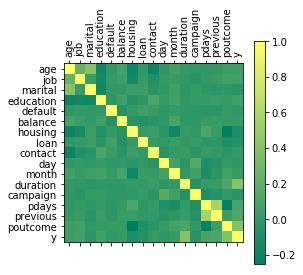

In [46]:
plt.matshow(new_df.corr(),cmap='summer')
plt.colorbar()
plt.xticks(list(range(len(new_df.columns))),new_df.columns,rotation='vertical')
plt.yticks(list(range(len(new_df.columns))),new_df.columns,rotation='horizontal')
plt.show()

In [47]:
new_df.corr()['y'].sort_values(ascending=False)

y            1.000000
duration     0.401118
poutcome     0.396350
previous     0.116714
pdays        0.104087
job          0.067156
education    0.055368
age          0.045092
month        0.023335
balance      0.017905
default      0.001303
contact     -0.002108
day         -0.011244
marital     -0.045815
campaign    -0.061147
loan        -0.070517
housing     -0.104683
Name: y, dtype: float64

([<matplotlib.axis.XTick at 0x1bf9c56ae80>,
 <a list of 17 Text xticklabel objects>)

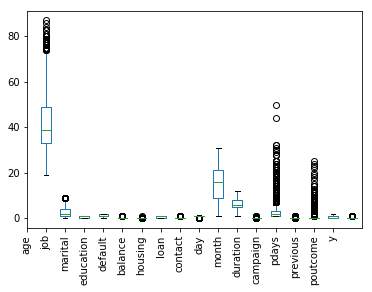

In [48]:
new_df.plot.box()
plt.xticks(list(range(len(new_df.columns))),new_df.columns,rotation='vertical')

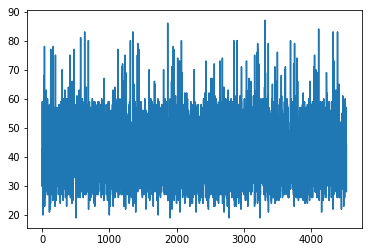

In [49]:
plt.plot(new_df.age.values)

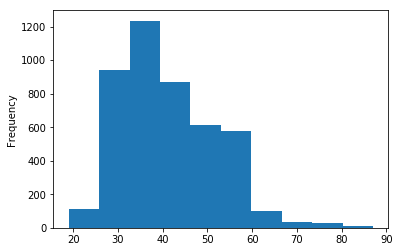

In [50]:
new_df['age'].plot(kind='hist')

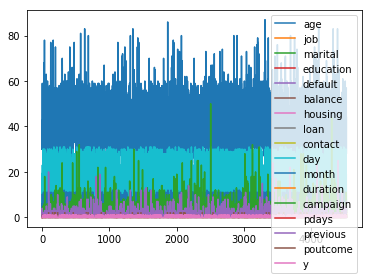

In [51]:
new_df.plot()

In [52]:
low=0.01
high=0.99
new_df.quantile([low,high])

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0.01,24.0,0.0,0.0,0.0,0.0,0.035457,0.0,0.0,0.0,2.0,1.0,0.002050,1.0,0.000000,0.0,0.0,0.0
0.99,72.0,9.0,1.0,2.0,1.0,0.234998,1.0,1.0,1.0,31.0,11.0,0.414876,16.0,0.425459,8.0,2.0,1.0


In [53]:
#lets say quantile df as q_df
qdf=new_df.quantile([low,high])

In [54]:
qdf.age

0.01    24.0
0.99    72.0
Name: age, dtype: float64

In [55]:
#now removing first 1% and last 1%
new_df.age=new_df.age.apply(lambda v: v if qdf.age[low]<v<qdf.age[high] else np.nan)

In [56]:
new_df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4406.000000,4483.000000,4521.000000,4334.000000,4521.000000,4521.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,816.000000,4521.000000
mean,41.057876,3.065804,0.735457,1.155053,0.016810,0.063565,0.566025,0.152842,0.905849,15.915284,6.166777,0.085938,2.793630,0.046751,0.542579,0.557598,0.115240
std,9.751862,2.493794,0.441138,0.666325,0.128575,0.040397,0.495676,0.359875,0.292084,8.247667,2.378380,0.085903,3.109807,0.114818,1.693562,0.750699,0.319347
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,1.000000,0.000000,0.045395,0.000000,0.000000,1.000000,9.000000,5.000000,0.033058,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,2.000000,1.000000,1.000000,0.000000,0.050429,1.000000,0.000000,1.000000,16.000000,6.000000,0.059835,2.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,4.000000,1.000000,2.000000,0.000000,0.064335,1.000000,0.000000,1.000000,21.000000,8.000000,0.107438,3.000000,0.000000,0.000000,1.000000,0.000000
max,71.000000,9.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,0.998678,50.000000,1.000000,25.000000,2.000000,1.000000


### Dropping null value rows

In [57]:
new_df[new_df.age.isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
13,NaN,7.0,0,1.0,0,0.051207,0,0,1.0,30,4,0.084959,1,0.000000,0,NaN,1
36,NaN,9.0,1,0.0,0,0.047543,0,0,0.0,22,10,0.030744,1,0.000000,0,NaN,1
39,NaN,0.0,0,2.0,0,0.049342,1,0,NaN,30,5,0.003967,18,0.000000,0,NaN,0
110,NaN,7.0,0,1.0,0,0.077865,0,0,1.0,30,6,0.083967,6,0.194954,3,2.0,1
117,NaN,6.0,0,1.0,0,0.099650,0,1,1.0,19,8,0.020165,1,0.000000,0,NaN,0
126,NaN,0.0,0,1.0,0,0.046066,0,0,NaN,15,9,0.015537,1,0.000000,0,NaN,0
129,NaN,9.0,1,2.0,0,0.107005,0,0,1.0,14,4,0.051901,1,0.000000,0,NaN,1
166,NaN,8.0,1,1.0,0,0.051167,0,0,0.0,16,3,0.025124,4,0.000000,0,NaN,0
194,NaN,7.0,0,1.0,0,0.168172,0,0,1.0,5,6,0.154380,2,0.000000,0,NaN,0
199,NaN,9.0,1,1.0,0,0.095086,0,0,0.0,15,4,0.059835,1,0.208716,2,2.0,1


In [58]:
new_df.age.dropna(inplace=True)

In [59]:
new_df[new_df.age.isnull()]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

{'whiskers': [<matplotlib.lines.Line2D at 0x1bf9da83748>,
 'caps': [<matplotlib.lines.Line2D at 0x1bf9da8d0b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bf9da835f8>],
 'medians': [<matplotlib.lines.Line2D at 0x1bf9da8d978>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bf9da8ddd8>],
 'means': []}

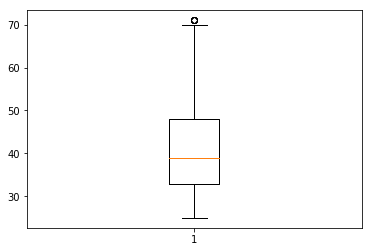

In [60]:
plt.boxplot(new_df.age)

# Covariance

In [61]:
new_df.cov()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,95.098806,4.999035,1.710818,-1.183271,-0.015047,0.030235,-0.844954,0.009882,-0.455416,-1.633041,1.708845,-0.016758,-0.083784,-0.022474,-0.335006,0.187671,0.051717
job,4.999035,6.219007,0.025489,-0.270300,0.000446,0.004643,-0.179680,0.007272,-0.064772,0.016021,0.143085,-0.001649,-0.332825,0.000305,0.093448,0.145676,0.053364
marital,1.710818,0.025489,0.194603,-0.050009,-0.000419,-0.000134,0.009063,0.007699,-0.007486,-0.024628,0.064926,-0.000931,0.011102,-0.001048,-0.026565,-0.003355,-0.006454
education,-1.183271,-0.270300,-0.050009,0.443989,-0.000997,0.001524,-0.023981,-0.006013,0.022508,0.093661,0.131709,-0.000643,0.020258,0.000881,0.034476,0.011456,0.011808
default,-0.015047,0.000446,-0.000419,-0.000997,0.016532,-0.000368,0.000439,0.002961,0.000847,-0.014062,0.002727,-0.000128,-0.004937,-0.000389,-0.005804,0.001487,0.000053
balance,0.030235,0.004643,-0.000134,0.001524,-0.000368,0.001632,-0.001006,-0.001037,-0.000438,-0.002891,0.009596,-0.000055,-0.001253,0.000044,0.001792,0.000618,0.000231
housing,-0.844954,-0.179680,0.009063,-0.023981,0.000439,-0.001006,0.245695,0.003291,0.006790,-0.127923,-0.201501,0.000670,-0.005509,0.006653,0.032420,-0.091682,-0.016571
loan,0.009882,0.007272,0.007699,-0.006013,0.002961,-0.001037,0.003291,0.129510,0.000756,-0.014483,0.033575,-0.000154,0.019160,-0.001284,-0.013478,-0.023561,-0.008104
contact,-0.455416,-0.064772,-0.007486,0.022508,0.000847,-0.000438,0.006790,0.000756,0.085313,-0.131600,0.011419,0.000670,-0.030056,0.000918,0.000938,-0.008153,-0.000216
day,-1.633041,0.016021,-0.024628,0.093661,-0.014062,-0.002891,-0.127923,-0.014483,-0.131600,68.024016,1.577849,-0.017450,4.121894,-0.089349,-0.825706,0.117800,-0.029616


In [63]:
#again saving our data
new_df.to_csv('processed2.csv',index=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bf9f4c73c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1bf9f4c7d68>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bf9f4c7240>],
 'medians': [<matplotlib.lines.Line2D at 0x1bf9f4ce668>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bf9f4ceac8>],
 'means': []}

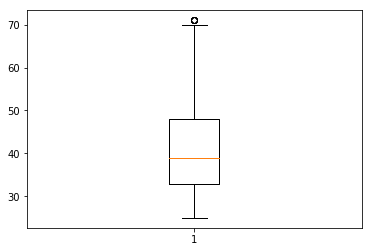

In [70]:
plt.boxplot(new_df.age)